In [8]:
#how to create a graph using 
#matplot lib and the battery data
#along with the 5 volt rail.

from zumi.zumi import Zumi
from zumi.util.screen import Screen
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time

time_out = 10
#10 seconds

zumi = Zumi()

zumi.MIN_I2C_DELAY = 0.0
#create list for the readings to be graphed
time_list = []
batt_list = []
vcc_list = []

time_passed = 0
init_time = time.time()

while(time_passed <= time_out):
    data = zumi.get_all_arduino_data()
    

    #these only work on the firmware version 1.2
    batt= data[6]/58+1
    #if the version is 1.0 use
    #batt = data[6]/15
    
    vcc = data[7]/48+3
    
    time_passed = time.time()-init_time
    #print(batt)
    
    #add data to lists
    time_list.append(time_passed)
    batt_list.append(batt)
    vcc_list.append(vcc)

print("done")
print("samples per second")
print(len(time_list)/time_passed)

Starting Zumi 
Pi Zero I2C is available
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected
done
samples per second
663.8272755067121


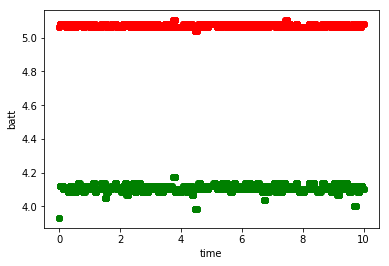

In [9]:
#graph the battery data and 5v voltage
plt.plot(time_list,batt_list,'go',time_list,vcc_list,'ro')
plt.ylabel('batt')
plt.xlabel('time')
plt.show()

done
samples per second
660.4747891393325


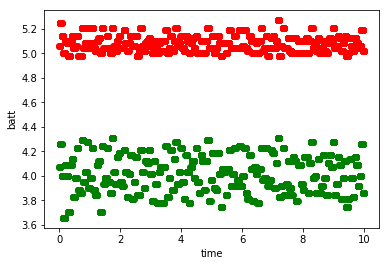

In [11]:
#here we measure when its driving in circles
time_list = []
batt_list = []
vcc_list = []

time_passed = 0
init_time = time.time()

zumi.control_motors(-80,80)
i=0
while(time_passed <= time_out):
    #zumi.control_motors(-i,i)
    if i < 125:
        i= i+1
    data = zumi.get_all_arduino_data()
    
    #these only work on the firmware version 1.2
    batt= data[6]/58+1
    #if the version is 1.0 use
    #batt = data[6]/15
    
    vcc = data[7]/48+3
    
    time_passed = time.time()-init_time
    #print(batt)
    
    #add data to lists
    time_list.append(time_passed)
    batt_list.append(batt)
    vcc_list.append(vcc)
zumi.stop()
print("done")
print("samples per second")
print(len(time_list)/time_passed)

#graph the battery data and 5v voltage
plt.plot(time_list,batt_list,'go',time_list,vcc_list,'ro')
plt.ylabel('batt')
plt.xlabel('time')
plt.show()

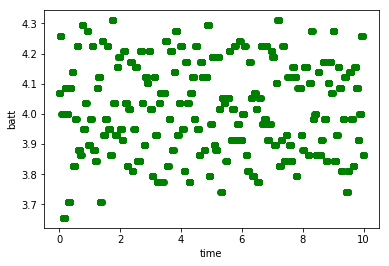

In [13]:
#graph the battery data
plt.plot(time_list,batt_list,'go')
plt.ylabel('batt')
plt.xlabel('time')
plt.show()
